# "Elements of Statistical Learning"
### Trevor Hastie, Robert Tibshirani, Jerome Friedman 

#### Section 2.3.3

##### Simulated data: 
- Generate 10 means m<sub>k</sub> from a bivariate Gaussian distribution N((1,0)<sup>T</sup>,I) and label class Blue.
- Generate 10 means m<sub>k</sub> from a bivariate Gaussian distribution N((0,1)<sup>T</sup>,I) and label class Orange.
- for each class, generate 100 observations as follows:
    - for each observation pick m<sub>k</sub> at random with probability 1/10 and generate N(m<sub>k</sub>,I/5)

In [1]:
import numpy as np
import random
import pandas as pd

np.random.seed(12)
random.seed(12)

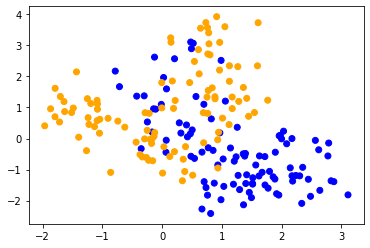

In [2]:
def generate_data(points=100):

    cov = np.identity(2)
    classes = {
        'blue':np.array([1,0]).T,
        'orange':np.array([0,1]).T
    }
    data = []
    for G in classes.keys():
        means = np.random.multivariate_normal(classes[G],cov,size=10)
        for i in range(0,points):
            d = {'Y':G}
            d['X_1'],d['X_2'] = np.random.multivariate_normal(random.choice(means),cov/5)
            data.append(d)

    df = pd.DataFrame.from_records(data)
    return df
df = generate_data()

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['X_1'],df['X_2'],c=df['Y'])
plt.show()

In [3]:
df.describe()

,X_1,X_2
count,200.000000,200.000000
mean,0.619625,0.322688
std,1.116156,1.456643
min,-1.965232,-2.414174
25%,-0.128479,-0.719751
50%,0.744332,0.179156
75%,1.386992,1.227957
max,3.113426,3.923839


### Gaussian Probability Density Function
Used to calculate liklihood

P(X|Y) = (1 / sqrt(2 * Pi) * sigma) * exp(-((x-mean^2 / ( 2 * sigma^2)))  

In [4]:
from math import sqrt
from math import pi
from math import exp

def calculate_probability(x,mean,stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2)))
    return (1 / (sqrt(2* pi) * stdev)) * exponent
    

In [5]:
x_1 = df.iloc[1]['X_1']

blue_x1_mean = df[df['Y']=='blue']['X_1'].mean()
blue_x1_std = df[df['Y']=='blue']['X_1'].std()

calculate_probability(x_1,blue_x1_mean,blue_x1_std)

0.3192744865552416

P(class=0|X1,X2) = ( P(X1|class=0) * P(X2|class=0) ) / P(class=0)

In [6]:
def class_probability(x,G,df):

    X1_prob = calculate_probability(
        x['X_1'],df[df['Y']==G]['X_1'].mean(),
        df[df['Y']==G]['X_1'].std()
    )
    X2_prob = calculate_probability(
        x['X_2'],df[df['Y']==G]['X_2'].mean(),
        df[df['Y']==G]['X_2'].std()
    )
    class_prob = df[df['Y']==G].shape[0] / df.shape[0]
    
    return X1_prob * X2_prob * 1/class_prob
    

In [7]:
df['probability_blue'] = df.apply(lambda x: class_probability(x,'blue',df),axis=1)
df['probability_orange'] = df.apply(lambda x: class_probability(x,'orange',df),axis=1)

In [8]:
df

,Y,X_1,X_2,probability_blue,probability_orange
0,blue,2.566800,-0.060056,0.085333,0.006869
1,blue,0.479575,3.107650,0.005494,0.058732
2,blue,1.496270,-1.903702,0.126967,0.006322
3,blue,-0.349927,-0.327203,0.062067,0.134758
4,blue,0.760984,-1.824261,0.127204,0.016425
...,...,...,...,...,...
195,orange,0.931309,-0.040574,0.250583,0.119024
196,orange,0.621276,2.082037,0.037262,0.147808
197,orange,0.962541,2.202961,0.036960,0.104578
198,orange,-0.623863,0.365770,0.030176,0.177505


In [9]:
X_set = df[['X_1','X_2']].to_numpy()

In [10]:
y_set = df['Y'].to_numpy()

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.1))

In [13]:
decision_boundary = pd.DataFrame({'X_1':X1.ravel(),'X_2':X2.ravel()})

In [15]:
decision_boundary['probability_blue'] = decision_boundary.apply(lambda x: class_probability(x,'blue',df),axis=1)
decision_boundary['probability_orange'] = decision_boundary.apply(lambda x: class_probability(x,'orange',df),axis=1)

In [20]:
decision_boundary

,X_1,X_2,probability_blue,probability_orange
0,-1.965232,-2.414174,0.000171,0.000918
1,-1.865232,-2.414174,0.000250,0.001118
2,-1.765232,-2.414174,0.000362,0.001349
3,-1.665232,-2.414174,0.000516,0.001610
4,-1.565232,-2.414174,0.000727,0.001902
...,...,...,...,...
3259,2.634768,3.885826,0.000367,0.000646
3260,2.734768,3.885826,0.000307,0.000494
3261,2.834768,3.885826,0.000253,0.000374
3262,2.934768,3.885826,0.000207,0.000280


In [17]:
pairs = []
for x in decision_boundary['X_1'].unique():
    X2 = decision_boundary[
        (decision_boundary['X_1']==x)
        &
        (decision_boundary['probability_blue']>decision_boundary['probability_orange'])
    ].sort_values(by='X_2',ascending=False)['X_2'].to_list()
    
    if len(X2)>0:
        pairs.append((x,X2[0]))
        

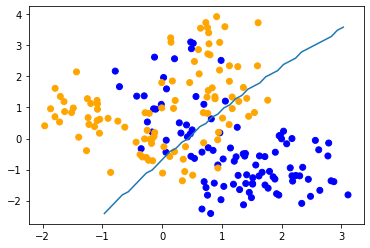

In [19]:
x = [x[0] for x in pairs]
y = [x[1] for x in pairs]

plt.scatter(df['X_1'],df['X_2'],c=df['Y'])
plt.plot(x,y)
plt.show()